In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Increasing max_column
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#Import data for dataframe
info_df = pd.read_csv('Data/superhero_info - superhero_info.csv')
powers_df = pd.read_csv("Data/superhero_powers - superhero_powers.csv")
#displaying both dataframe
display(info_df.head())
display(powers_df.head())

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


# Transforming the Data

## Splitting Hero|Publisher to two columns

In [3]:
#Spliting values in 'Hero|Publisher' by '|' then add two columns back
hero_pub= info_df['Hero|Publisher'].str.split('|', expand=True)
info_df.insert(0, 'hero_names', hero_pub[0])
info_df.insert(1, 'Publisher', hero_pub[1])
info_df.drop(columns='Hero|Publisher', inplace=True)
info_df.head()

,hero_names,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


## Merging the info_df to the powers_df 

In [4]:
#merging the two column by hero_names
super_df = info_df.merge(powers_df, how='inner', on='hero_names' )
super_df.head()
#renaming hero_names col to Hero
super_df.rename(columns={'hero_names':'Hero'}, inplace=True)

## Splitting Measurements into Height and weight columns

In [5]:
# convert it to json dict
super_df['Measurements']= super_df['Measurements'].str.replace("'",'"')
super_df['Measurements'] =super_df['Measurements'].apply(json.loads)
#creating two column base on the dict
h_w_df = super_df['Measurements'].apply(pd.Series)
#dropping Measure col
super_df.drop(columns='Measurements', inplace=True)
#add the two column back super_df
super_df.insert(6, 'Height', h_w_df['Height'])
super_df.insert(9, 'Weight', h_w_df['Weight'])
super_df.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Height,Eye color,Skin color,Weight,Powers
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,203.0 cm,yellow,Unknown,441.0 kg,"Accelerated Healing,Durability,Longevity,Super..."
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,191.0 cm,blue,blue,65.0 kg,"Agility,Accelerated Healing,Cold Resistance,Du..."


## Hot encoding Powers columns

In [6]:
#split it by ',' to change it to list then  change it to string to replace single quotes with doublequotes
super_df['Powers']= super_df['Powers'].str.split(',', expand=False).astype(str).str.replace("'",'"')

test_coord = super_df.loc[0, 'Powers']
print(type(test_coord), test_coord)


<class 'str'> ["Accelerated Healing", "Durability", "Longevity", "Super Strength", "Stamina", "Camouflage", "Self-Sustenance"]


In [7]:
#change it into list
super_df['Powers'] =super_df['Powers'].apply(json.loads)

#explode all the value in the list to their own row
exploded = super_df.explode('Powers')
## saving the unique values from the exploded column
cols_to_make = exploded['Powers'].dropna().unique()
#Making dataframe with each column being a type of power
p_df = pd.DataFrame(columns=cols_to_make)

In [8]:
#add true/false based on if they have that power list in the "Powers" column.
super_df['Powers']= super_df['Powers'].astype(str)
for col in cols_to_make:
    p_df[col] = super_df['Powers'].str.contains(col)
#dropping col
super_df.drop(columns='Powers', inplace=True)
#concat the p_df to super_df
super_df = pd.concat((super_df,  p_df), axis = 1)
super_df.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Height,Eye color,Skin color,Weight,Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance,Agility,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Super Speed,Invulnerability,Animation,Super Breath,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Molecular Manipulation,Heat Resistance,Matter Absorption,Stealth,Flight,Power Suit,Energy Blasts,Energy Beams,Power Cosmic,Heat Generation,Danger Sense,Teleportation,Phasing,Force Fields,Hypnokinesis,Energy Manipulation,Invisibility,Enhanced Senses,Jump,Substance Secretion,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Size Changing,Weapon-based Powers,Shapeshifting,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Enhanced Hearing,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Magic,Psionic Powers,Gliding,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Regeneration,Toxin and Disease Control,Empathy,Animal Control,Elasticity,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Dimensional Travel,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Energy Resistance,Vision - Cryo,Clairvoyance,Probability Manipulation,Electrokinesis,Darkforce Manipulation,Illusions,Death Touch,Gravity Control,Precognition,Time Manipulation,Omnilingualism,Astral Projection,Technopath/Cyberpath,Mind Control,Mind Blast,Cloaking,Telepathy Resistance,Mind Control Resistance,Radiation Control,Radiation Absorption,Magic Resistance,Dimensional Awareness,Intangibility,Element Control,Wind Control,Echolocation,Radar Sense,Resurrection,The Force,Possession,Astral Travel,Summoning,Banish,Adaptation,Electrical Transport,Speed Force,Omnipotent,Grim Reaping,Reality Warping,Portal Creation,Vitakinesis,Projection,Insanity,Plant Control,Photographic Reflexes,Anti-Gravity,Power Nullifier,Hair Manipulation,Weather Control,Nova Force,Odin Force,Phoenix Force,Power Sense,Qwardian Power Ring,Melting,Changing Armor,Terrakinesis
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,203.0 cm,yellow,Unknown,441.0 kg,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,191.0 cm,blue,blue,65.0 kg,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

## Converting Height and Weight column to float

In [9]:
super_df['Height']= super_df['Height'].apply(lambda x: x.strip().replace('cm',''))
super_df.rename(columns={'Height':'Height(cm)'}, inplace=True)
super_df['Height(cm)'] = super_df['Height(cm)'].astype('float64')

super_df['Weight']= super_df['Weight'].apply(lambda x: x.strip().replace('kg',''))
super_df.rename(columns={'Weight':'Weight(kg)'}, inplace=True)
super_df['Weight(kg)'] = super_df['Weight(kg)'].astype('float64')
super_df.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Height(cm),Eye color,Skin color,Weight(kg),Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance,Agility,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Super Speed,Invulnerability,Animation,Super Breath,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Molecular Manipulation,Heat Resistance,Matter Absorption,Stealth,Flight,Power Suit,Energy Blasts,Energy Beams,Power Cosmic,Heat Generation,Danger Sense,Teleportation,Phasing,Force Fields,Hypnokinesis,Energy Manipulation,Invisibility,Enhanced Senses,Jump,Substance Secretion,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Size Changing,Weapon-based Powers,Shapeshifting,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Enhanced Hearing,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Magic,Psionic Powers,Gliding,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Regeneration,Toxin and Disease Control,Empathy,Animal Control,Elasticity,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Dimensional Travel,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Energy Resistance,Vision - Cryo,Clairvoyance,Probability Manipulation,Electrokinesis,Darkforce Manipulation,Illusions,Death Touch,Gravity Control,Precognition,Time Manipulation,Omnilingualism,Astral Projection,Technopath/Cyberpath,Mind Control,Mind Blast,Cloaking,Telepathy Resistance,Mind Control Resistance,Radiation Control,Radiation Absorption,Magic Resistance,Dimensional Awareness,Intangibility,Element Control,Wind Control,Echolocation,Radar Sense,Resurrection,The Force,Possession,Astral Travel,Summoning,Banish,Adaptation,Electrical Transport,Speed Force,Omnipotent,Grim Reaping,Reality Warping,Portal Creation,Vitakinesis,Projection,Insanity,Plant Control,Photographic Reflexes,Anti-Gravity,Power Nullifier,Hair Manipulation,Weather Control,Nova Force,Odin Force,Phoenix Force,Power Sense,Qwardian Power Ring,Melting,Changing Armor,Terrakinesis
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,203.0,yellow,Unknown,441.0,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,191.0,blue,blue,65.0,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

# Data Analyzing 

## Average weight of super powers who have Super Speed to those who do not.

Text(0, 0.5, 'Weight(kg)')

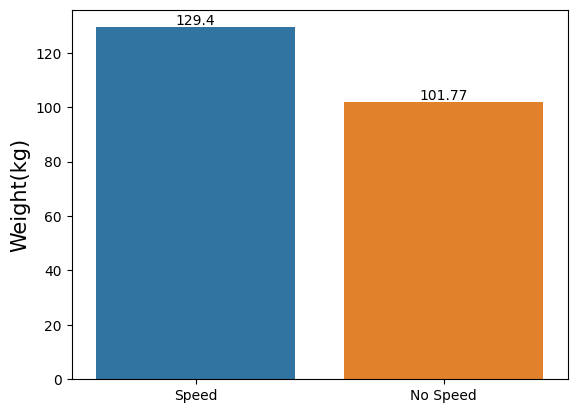

In [30]:
#Making a filter
speed_filter = super_df['Super Speed'] == True
#Making a dataframe
speed_avg = super_df.loc[(speed_filter) ,'Weight(kg)'].mean().round(2)
nonspeed_avg = super_df.loc[(-speed_filter) ,'Weight(kg)'].mean().round(2)
#
ax = sns.barplot(x=['Speed','No Speed'],y=[speed_avg, nonspeed_avg])
ax.bar_label(ax.containers[0])
plt.ylabel('Weight(kg)', fontsize=15)

> Average weight of super powers who have Super Speed is 129.40 and those who do not is 101.77

## What is the average height of heroes for each publisher?

Text(0, 0.5, 'Height(cm)')

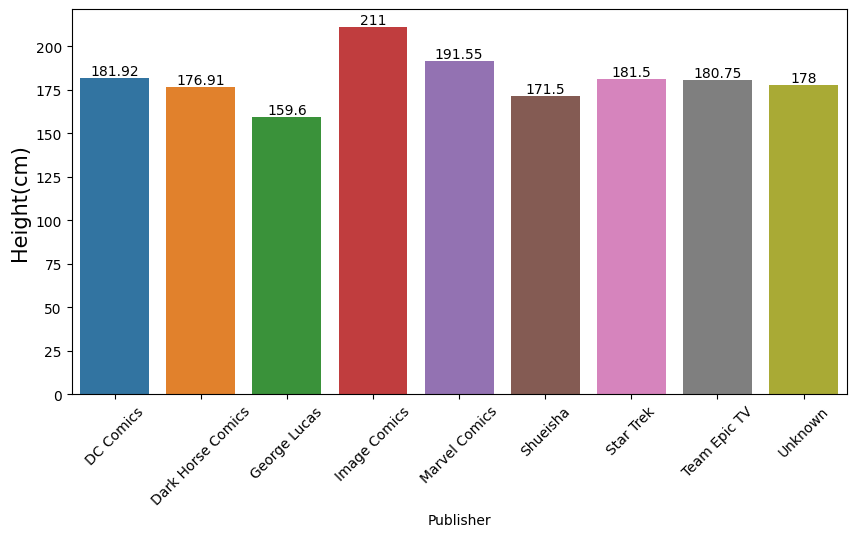

In [31]:
height_by_pub= super_df.groupby('Publisher')['Height(cm)'].mean().round(2)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=height_by_pub.index,y=height_by_pub.values)
ax.bar_label(ax.containers[0]);
plt.xticks(rotation = 45)
plt.ylabel('Height(cm)', fontsize=15)

> Hero from Image Comic are tallest with avg height of 211 